<a href="https://colab.research.google.com/github/uyenvybuile1502/homeworkfuzzy/blob/main/bai_91011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.5 MB/s eta 0:00:00


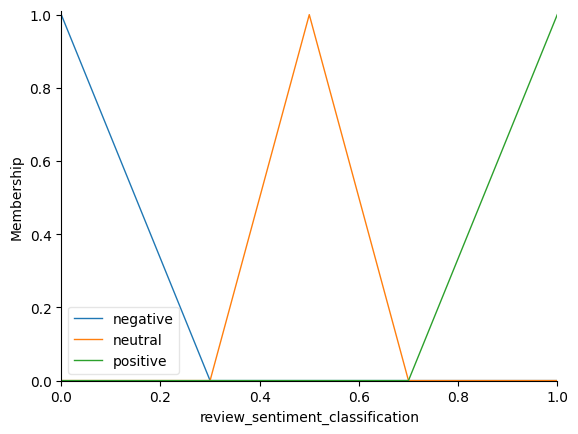

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sentiment_score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'emotion_intensity')
positive_words = ctrl.Antecedent(np.arange(0, 10, 1), 'positive_words')
negative_words = ctrl.Antecedent(np.arange(0, 10, 1), 'negative_words')

review_sentiment_classification = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'review_sentiment_classification')


sentiment_score['negative'] = fuzz.trimf(sentiment_score.universe, [0, 0, 0.3])
sentiment_score['neutral'] = fuzz.trimf(sentiment_score.universe, [0.3, 0.4, 0.7])
sentiment_score['positive'] = fuzz.trimf(sentiment_score.universe, [0.7, 0.9, 1])

emotion_intensity['low'] = fuzz.trimf(emotion_intensity.universe, [0, 0, 0.3])
emotion_intensity['medium'] = fuzz.trimf(emotion_intensity.universe, [0.3, 0.4, 0.7])
emotion_intensity['high'] = fuzz.trimf(emotion_intensity.universe, [0.7, 0.8, 1])

positive_words['few'] = fuzz.trimf(positive_words.universe, [0, 0, 2])
positive_words['some'] = fuzz.trimf(positive_words.universe, [2, 4, 7])
positive_words['many'] = fuzz.trimf(positive_words.universe, [5, 7, 9])

negative_words['few'] = fuzz.trimf(negative_words.universe, [0, 0, 2])
negative_words['some'] = fuzz.trimf(negative_words.universe, [1, 4, 5])
negative_words['many'] = fuzz.trimf(negative_words.universe, [5, 7, 9])

review_sentiment_classification['negative'] = fuzz.trimf(review_sentiment_classification.universe, [0, 0, 0.3])
review_sentiment_classification['neutral'] = fuzz.trimf(review_sentiment_classification.universe, [0.3, 0.5, 0.7])
review_sentiment_classification['positive'] = fuzz.trimf(review_sentiment_classification.universe, [0.7, 1, 1])

rule1 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['high'], review_sentiment_classification['negative'])
rule2 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['low'], review_sentiment_classification['neutral'])
rule3 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'], review_sentiment_classification['neutral'])
rule4 = ctrl.Rule(sentiment_score['positive'] & emotion_intensity['high'], review_sentiment_classification['positive'])

rule5 = ctrl.Rule(positive_words['many'] & negative_words['few'], review_sentiment_classification['positive'])
rule6 = ctrl.Rule(positive_words['few'] & negative_words['many'], review_sentiment_classification['negative'])
rule7 = ctrl.Rule(positive_words['some'] & negative_words['some'], review_sentiment_classification['neutral'])

rule8 = ctrl.Rule(sentiment_score['negative'] & negative_words['many'] & emotion_intensity['high'], review_sentiment_classification['negative'])
rule9 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'] & positive_words['some'], review_sentiment_classification['neutral'])
rule10 = ctrl.Rule(sentiment_score['positive'] & positive_words['many'] & emotion_intensity['high'], review_sentiment_classification['positive'])


feedback_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])

feedback_simulation = ctrl.ControlSystemSimulation(feedback_ctrl)
review_sentiment_classification.view()

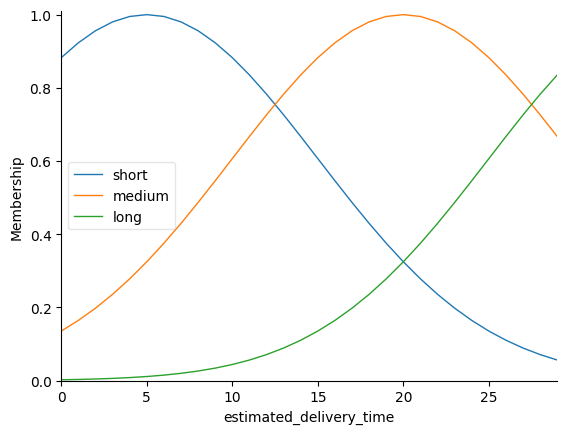

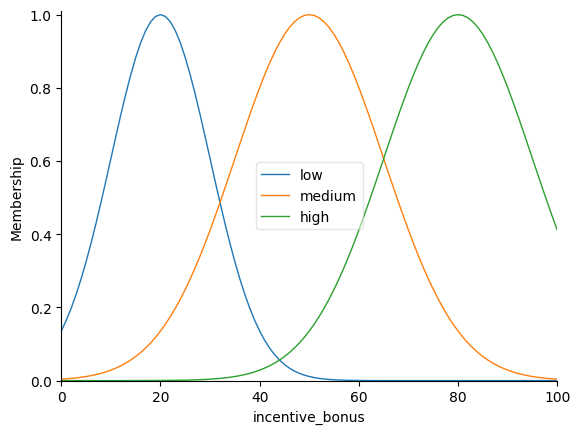

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

traffic_condition = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_condition')
distance_to_Customer = ctrl.Antecedent(np.arange(0, 10, 1), 'distance_to_Customer')
weather_condition = ctrl.Antecedent(np.arange(0, 3, 1), 'weather_condition')
order_preparation_time= ctrl.Antecedent(np.arange(0, 21, 1), 'order_preparation_time')
driver_fatigue_level = ctrl.Antecedent(np.arange(0, 101, 1), 'driver_fatigue_level')

estimated_delivery_time = ctrl.Consequent(np.arange(0, 30, 1), 'estimated_delivery_time')
incentive_bonus = ctrl.Consequent(np.arange(0, 101, 1), 'incentive_bonus')
driver_performance_rating = ctrl.Consequent(np.arange(1, 6, 1), 'driver_performance_rating')


traffic_condition['low'] = fuzz.gaussmf(traffic_condition.universe, 20, 10)
traffic_condition['medium'] = fuzz.gaussmf(traffic_condition.universe, 50, 20)
traffic_condition['high'] = fuzz.gaussmf(traffic_condition.universe, 80, 30)

distance_to_Customer['short'] = fuzz.gaussmf(distance_to_Customer.universe, 3, 1)
distance_to_Customer['medium'] = fuzz.gaussmf(distance_to_Customer.universe, 5, 1)
distance_to_Customer['long'] = fuzz.gaussmf(distance_to_Customer.universe, 8, 1)

weather_condition['clear'] = fuzz.gaussmf(weather_condition.universe, 1,1)
weather_condition['rain'] = fuzz.gaussmf(weather_condition.universe, 2, 1)
weather_condition['stormy'] = fuzz.gaussmf(weather_condition.universe, 2, 2)

order_preparation_time['fast'] = fuzz.gaussmf(order_preparation_time.universe, 3, 2)
order_preparation_time['medium'] = fuzz.gaussmf(order_preparation_time.universe, 10, 3)
order_preparation_time['slow'] = fuzz.gaussmf(order_preparation_time.universe, 18, 3)

driver_fatigue_level['low'] = fuzz.gaussmf(driver_fatigue_level.universe, 20, 10)
driver_fatigue_level['medium'] = fuzz.gaussmf(driver_fatigue_level.universe, 50, 15)
driver_fatigue_level['high'] = fuzz.gaussmf(driver_fatigue_level.universe, 80, 15)

estimated_delivery_time['short'] = fuzz.gaussmf(estimated_delivery_time.universe, 5, 10)
estimated_delivery_time['medium'] = fuzz.gaussmf(estimated_delivery_time.universe, 20, 10)
estimated_delivery_time['long'] = fuzz.gaussmf(estimated_delivery_time.universe, 35, 10)

incentive_bonus['low'] = fuzz.gaussmf(incentive_bonus.universe, 20, 10)
incentive_bonus['medium'] = fuzz.gaussmf(incentive_bonus.universe, 50, 15)
incentive_bonus['high'] = fuzz.gaussmf(incentive_bonus.universe, 80, 15)

driver_performance_rating['poor'] = fuzz.gaussmf(driver_performance_rating.universe, 1, 1.2)
driver_performance_rating['average'] = fuzz.gaussmf(driver_performance_rating.universe, 3, 1.0)
driver_performance_rating['excellent'] = fuzz.gaussmf(driver_performance_rating.universe, 5, 1.2)

rule1 = ctrl.Rule(traffic_condition['low'] & distance_to_Customer['short'], estimated_delivery_time['short'])
rule2 = ctrl.Rule(traffic_condition['medium'] & distance_to_Customer['medium'], estimated_delivery_time['medium'])
rule3 = ctrl.Rule(traffic_condition['high'] & distance_to_Customer['long'], estimated_delivery_time['long'])

rule4 = ctrl.Rule(weather_condition['clear'], incentive_bonus['low'])
rule5 = ctrl.Rule(weather_condition['rain'], incentive_bonus['medium'])
rule6 = ctrl.Rule(weather_condition['stormy'], incentive_bonus['high'])

rule7 = ctrl.Rule(order_preparation_time['fast'] & traffic_condition['low'], estimated_delivery_time['short'])
rule8 = ctrl.Rule(order_preparation_time['medium'] & traffic_condition['medium'], estimated_delivery_time['medium'])
rule9 = ctrl.Rule(order_preparation_time['slow'] & traffic_condition['high'], estimated_delivery_time['long'])

rule10 = ctrl.Rule(driver_fatigue_level['low'], driver_performance_rating['excellent'])
rule11 = ctrl.Rule(driver_fatigue_level['medium'], driver_performance_rating['average'])
rule12 = ctrl.Rule(driver_fatigue_level['high'], driver_performance_rating['poor'])

rule13 = ctrl.Rule(distance_to_Customer['long'] & weather_condition['stormy'] & traffic_condition['high'],
                   (estimated_delivery_time['long'], incentive_bonus['high']))
rule14 = ctrl.Rule(distance_to_Customer['short'] & weather_condition['clear'] & traffic_condition['low'],
                   (estimated_delivery_time['short'], incentive_bonus['low']))
rule15 = ctrl.Rule(driver_fatigue_level['high'] & traffic_condition['high'],
                   (driver_performance_rating['poor'], estimated_delivery_time['long']))

delivery_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
delivery_simulation = ctrl.ControlSystemSimulation(delivery_ctrl)

estimated_delivery_time.view()
incentive_bonus.view()


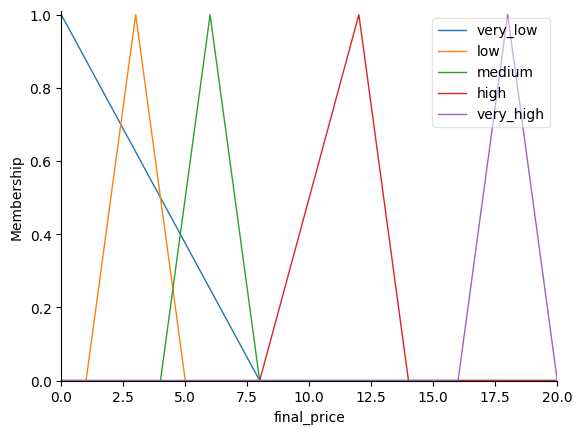

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


market_demand = ctrl.Antecedent(np.arange(0, 21, 1), 'market_demand')
competitor_price = ctrl.Antecedent(np.arange(0, 21, 1), 'competitor_price')
production_cost = ctrl.Antecedent(np.arange(0, 21, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 21, 1), 'seasonality')
inventory_level = ctrl.Antecedent(np.arange(0, 21, 1), 'inventory_level')

final_price = ctrl.Consequent(np.arange(0, 21, 1), 'final_price')


market_demand['low'] = fuzz.trimf(market_demand.universe, [0, 0, 6])
market_demand['medium'] = fuzz.trimf(market_demand.universe, [11, 13, 15])
market_demand['high'] = fuzz.trimf(market_demand.universe, [15,17,19])

competitor_price['low'] = fuzz.trimf(competitor_price.universe, [0, 0, 6])
competitor_price['medium'] = fuzz.trimf(competitor_price.universe, [8,10,16])
competitor_price['high'] = fuzz.trimf(competitor_price.universe, [16, 18,20])

production_cost['low'] = fuzz.trimf(production_cost.universe, [0, 0, 8])
production_cost['medium'] = fuzz.trimf(production_cost.universe, [10,12,14])
production_cost['high'] = fuzz.trimf(production_cost.universe, [16,18,20])

seasonality['off_peak'] = fuzz.trimf(seasonality.universe, [0, 0, 8])
seasonality['normal'] = fuzz.trimf(seasonality.universe, [14,15,17])
seasonality['peak'] = fuzz.trimf(seasonality.universe, [16,18,20])

inventory_level['low'] = fuzz.trimf(inventory_level.universe, [0, 0, 8])
inventory_level['medium'] = fuzz.trimf(inventory_level.universe, [8,10,11])
inventory_level['high'] = fuzz.trimf(inventory_level.universe, [12,14,16])
inventory_level['very_high'] = fuzz.trimf(inventory_level.universe, [17,19,20])

final_price['very_low'] = fuzz.trimf(final_price.universe, [0, 0, 8])
final_price['low'] = fuzz.trimf(final_price.universe, [1, 3, 5])
final_price['medium'] = fuzz.trimf(final_price.universe, [4,6,8])
final_price['high'] = fuzz.trimf(final_price.universe, [8, 12, 14])
final_price['very_high'] = fuzz.trimf(final_price.universe, [16,18,20])


rule1 = ctrl.Rule(market_demand['high'] & competitor_price['high'] & inventory_level['low'], final_price['high'])
rule2 = ctrl.Rule(market_demand['high'] & seasonality['peak'] & inventory_level['low'], final_price['very_high'])
rule3 = ctrl.Rule(market_demand['medium'] & production_cost['high'] & inventory_level['low'], final_price['very_high'])

rule4 = ctrl.Rule(market_demand['high'] & competitor_price['medium'] & inventory_level['medium'], final_price['high'])
rule5 = ctrl.Rule(market_demand['medium'] & competitor_price['high'] & inventory_level['low'], final_price['high'])
rule6 = ctrl.Rule(market_demand['medium'] & seasonality['peak'] & inventory_level['medium'], final_price['high'])

rule7 = ctrl.Rule(market_demand['medium'] & competitor_price['medium'] & inventory_level['medium'], final_price['medium'])
rule8 = ctrl.Rule(market_demand['medium'] & competitor_price['high'] & inventory_level['medium'], final_price['medium'])
rule9 = ctrl.Rule(market_demand['low'] & competitor_price['high'] & inventory_level['medium'], final_price['medium'])
rule10 = ctrl.Rule(market_demand['medium'] & production_cost['medium'] & inventory_level['medium'], final_price['medium'])

rule11 = ctrl.Rule(market_demand['low'] & competitor_price['low'] & inventory_level['high'], final_price['low'])
rule12 = ctrl.Rule(market_demand['medium'] & production_cost['medium'] & inventory_level['high'], final_price['low'])
rule13 = ctrl.Rule(market_demand['low'] & seasonality['off_peak'] & inventory_level['high'], final_price['low'])

rule14 = ctrl.Rule(market_demand['low'] & competitor_price['low'] & inventory_level['very_high'], final_price['very_low'])
rule15 = ctrl.Rule(market_demand['low'] & seasonality['off_peak'] & inventory_level['very_high'], final_price['very_low'])
rule16 = ctrl.Rule(market_demand['medium'] & competitor_price['low'] & inventory_level['very_high'], final_price['very_low'])

pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,rule11, rule12, rule13, rule14, rule15, rule16])

pricing_simulation = ctrl.ControlSystemSimulation(pricing_ctrl)

final_price.view()